In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0;
X_test = X_test.astype('float32') / 255.0;

In [4]:
X_train_img = X_train.reshape(-1, 28, 28);
X_test_img = X_test.reshape(-1, 28, 28)

In [5]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [6]:
perceptron = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation='softmax')
])

In [7]:
perceptron.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history_percep = perceptron.fit(
    X_train_img, y_train_cat,
    epochs = 20,
    batch_size=32,
    validation_data = (X_test_img, y_test_cat),
    verbose = 1,
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9116 - loss: 0.3178 - val_accuracy: 0.9167 - val_loss: 0.3026
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9116 - loss: 0.3189 - val_accuracy: 0.9181 - val_loss: 0.2996
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9120 - loss: 0.3170 - val_accuracy: 0.9177 - val_loss: 0.2975
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9135 - loss: 0.3123 - val_accuracy: 0.9186 - val_loss: 0.2952
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9139 - loss: 0.3094 - val_accuracy: 0.9177 - val_loss: 0.2936
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9149 - loss: 0.3046 - val_accuracy: 0.9193 - val_loss: 0.2917
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9163 - loss: 0.3012 - val_accuracy: 0.9211 - val_loss: 0.2907
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9171 - loss: 0.3044 - 

In [11]:
acc_percep = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]
acc_percep

0.921999990940094

In [12]:
## ANN
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from enum import verify
history_ann = ann.fit(
    X_train_img, y_train_cat,
    epochs = 10,
    batch_size = 32,
    validation_data=(X_test_img, y_test_cat),
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8500 - loss: 0.0949 - val_accuracy: 0.9628 - val_loss: 0.0246
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.0218 - val_accuracy: 0.9696 - val_loss: 0.0190
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0148 - val_accuracy: 0.9736 - val_loss: 0.0166
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0102 - val_accuracy: 0.9745 - val_loss: 0.0159
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0081 - val_accuracy: 0.9769 - val_loss: 0.0144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0066 - val_accuracy: 0.9788 - val_loss: 0.0142
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0049 - val_accuracy: 0.9791 - val_loss: 0.0136
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0045 - 

In [15]:
acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]
acc_ann

0.980400025844574

In [21]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1);
X_test_cnn = X_test.reshape(-1, 28, 28, 1);

In [22]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_cnn = cnn.fit(
    X_train_cnn.reshape(-1, 28, 28, 1), y_train_cat,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_cnn.reshape(-1, 28, 28, 1), y_test_cat),
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9813 - loss: 0.0660 - val_accuracy: 0.9904 - val_loss: 0.0265
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9919 - val_loss: 0.0242
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.9919 - val_loss: 0.0237
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9938 - val_loss: 0.0207
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0287 - val_accuracy: 0.9934 - val_loss: 0.0221
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9923 - val_loss: 0.0255
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9930 - loss: 0.0236 - val_accuracy: 0.9933 - val_loss: 0.0223
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0219 - 

In [28]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
acc_cnn

0.9916999936103821

In [29]:
def plot_training(history, title) :
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label = "Train")
  plt.plot(history.history['val_accuracy'], label = "Test")
  plt.title(f"{title} Accuracy")

  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label = "Train")
  plt.plot(history.history['val_loss'], label = "Test")
  plt.title(f"{title} Loss")
  plt.legend()
  plt.show()

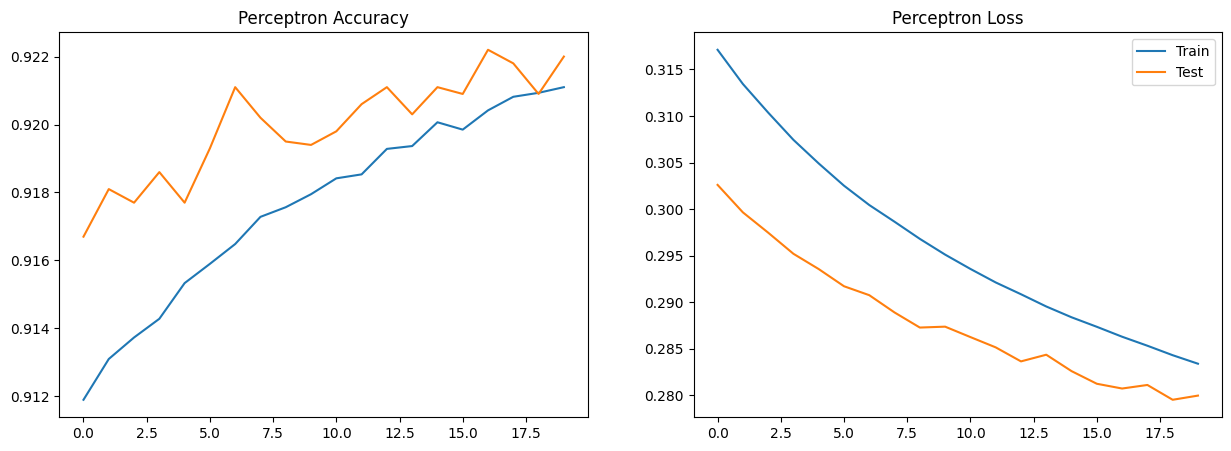

In [30]:
plot_training(history_percep, "Perceptron")

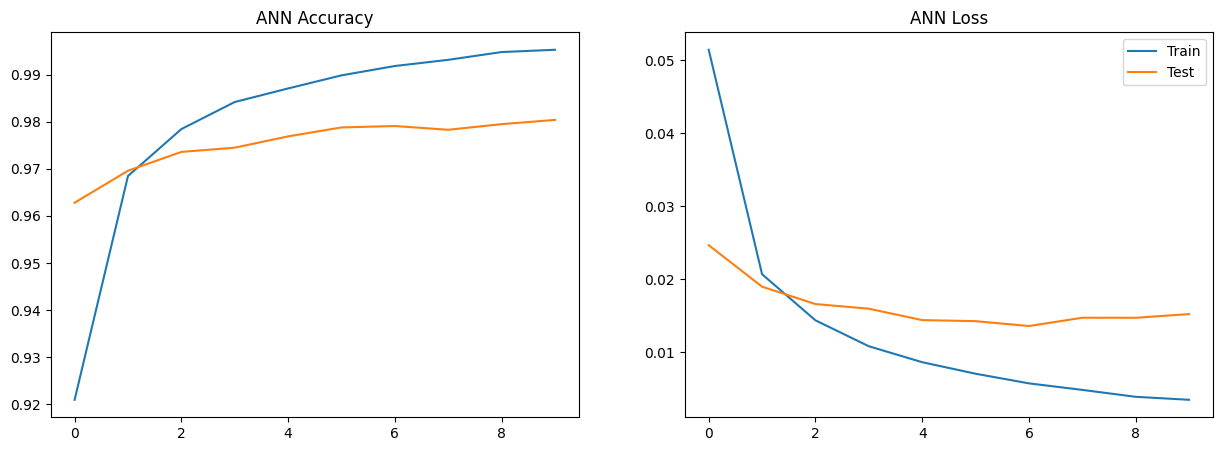

In [31]:
plot_training(history_ann, "ANN")

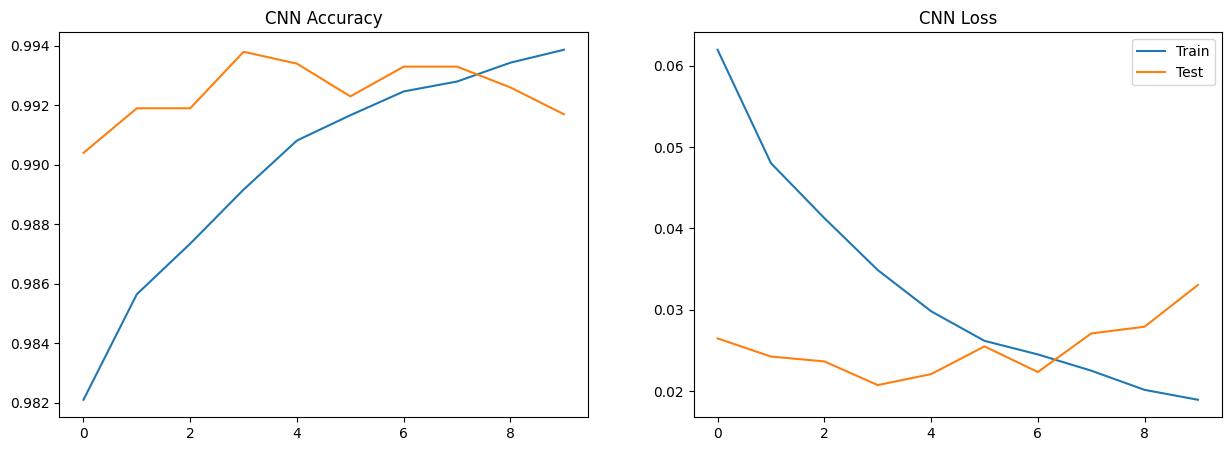

In [32]:
plot_training(history_cnn, "CNN")

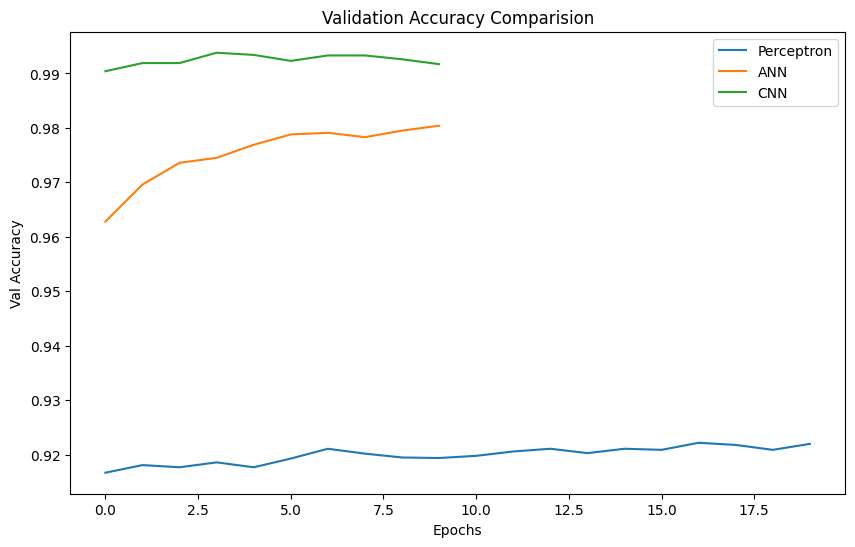

In [33]:
plt.figure(figsize=(10,6))
plt.plot(history_percep.history['val_accuracy'], label="Perceptron")
plt.plot(history_ann.history['val_accuracy'], label="ANN")
plt.plot(history_cnn.history['val_accuracy'], label="CNN")
plt.title("Validation Accuracy Comparision")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

# Task
Create a Python function named `compare_predictions` that takes the test images (`X_test_img`), true labels (`y_test`), and the three trained models (`perceptron`, `ann`, `cnn`) as input. This function should select 10 random images from the test set, make predictions using each model, and then visualize the original image, its true label, and the predictions from the Perceptron, ANN, and CNN models for each selected image. After defining the function, call it with the relevant variables.

## Generate Prediction Comparison Function

### Subtask:
Create a Python function that takes the test images, true labels, and the three trained models (Perceptron, ANN, CNN) as input. This function will then select a subset of images, make predictions using each model, and visualize the original image, true label, and the predictions from all three models side-by-side.


**Reasoning**:
I will define the `compare_predictions` function as per the instructions, including random image selection, making predictions with each model, and visualizing the results with true and predicted labels.



In [34]:
def compare_predictions(X_test_img, y_test, perceptron, ann, cnn):
    # Randomly select 10 unique indices
    random_indices = np.random.choice(len(X_test_img), 10, replace=False)

    plt.figure(figsize=(20, 15))
    for i, idx in enumerate(random_indices):
        # Retrieve original image and true label
        original_image = X_test_img[idx]
        true_label = y_test[idx]

        # Prepare image for perceptron/ANN prediction
        perceptron_input = original_image.reshape(1, 28, 28)
        ann_input = original_image.reshape(1, 28, 28)

        # Prepare image for CNN prediction
        cnn_input = original_image.reshape(1, 28, 28, 1)

        # Make predictions
        percep_pred = np.argmax(perceptron.predict(perceptron_input, verbose=0))
        ann_pred = np.argmax(ann.predict(ann_input, verbose=0))
        cnn_pred = np.argmax(cnn.predict(cnn_input, verbose=0))

        # Create subplot
        plt.subplot(2, 5, i + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f"True: {true_label}\nP: {percep_pred}, A: {ann_pred}, C: {cnn_pred}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("Function 'compare_predictions' defined successfully.")

Function 'compare_predictions' defined successfully.


**Reasoning**:
The function `compare_predictions` has been defined successfully. The next step is to call this function with the required arguments to perform the comparison and visualization as per the subtask instructions.



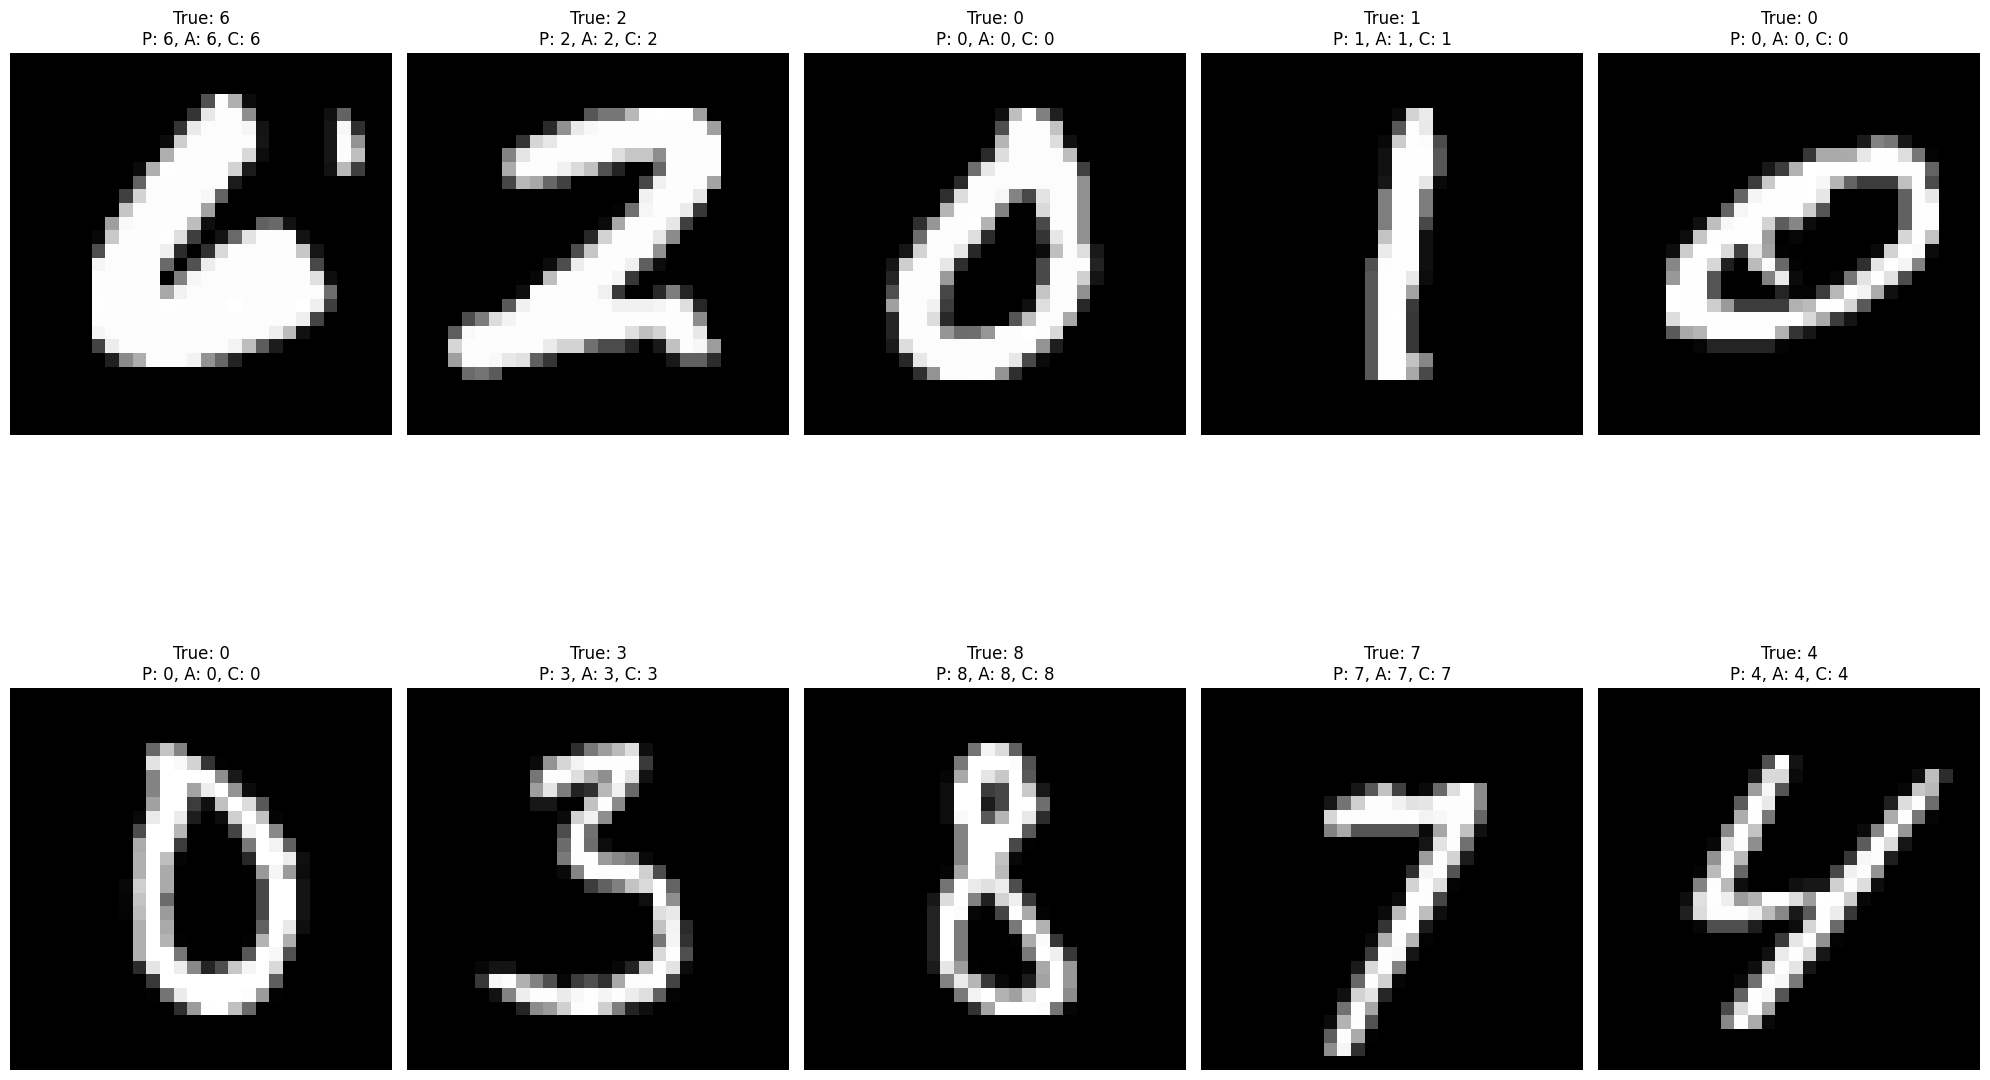

In [35]:
compare_predictions(X_test_img, y_test, perceptron, ann, cnn)

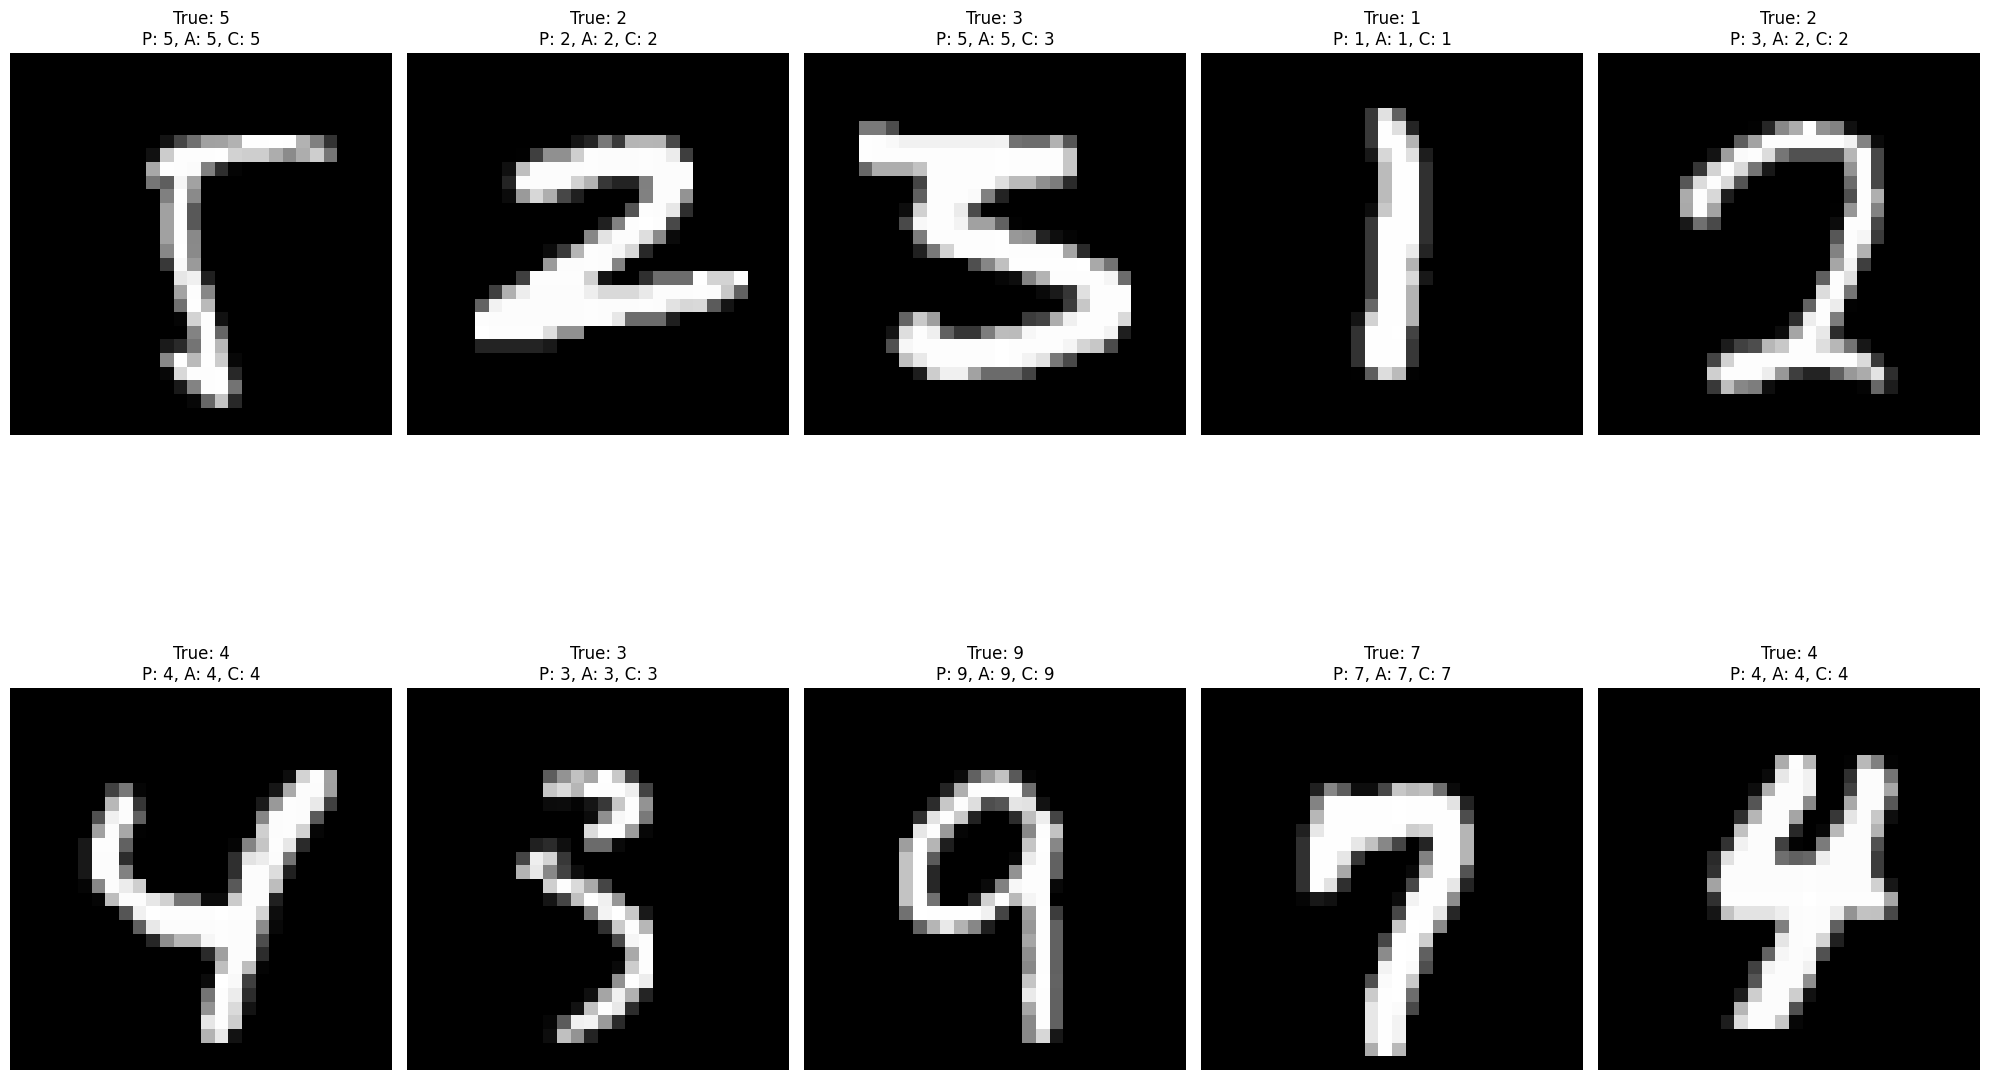

In [36]:
compare_predictions(X_test_img, y_test, perceptron, ann, cnn)

## Final Task

### Subtask:
Review the generated plots to compare the prediction performance of the three models on individual digits.


## Summary:

### Data Analysis Key Findings

*   A Python function, `compare_predictions`, was successfully created and executed to visualize model performance.
*   This function randomly selected 10 unique images from the test set.
*   For each selected image, it displayed the original image, its true label, and the predictions made by the Perceptron, ANN, and CNN models.
*   The execution of the function successfully generated a Matplotlib figure displaying these 10 comparison plots.

### Insights or Next Steps

*   Review the generated plots to qualitatively assess which digits each model struggles with or excels at, providing visual insights into their strengths and weaknesses.
*   The visual comparison serves as a diagnostic tool; cases where models disagree or make incorrect predictions can inform further model refinement or error analysis.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


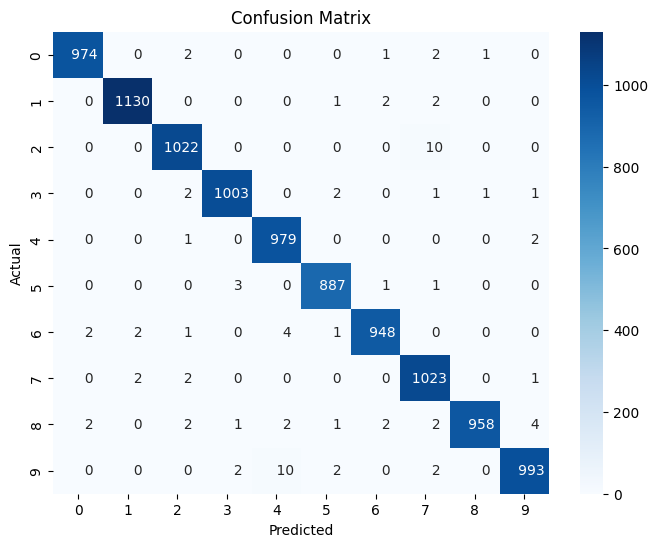

In [41]:
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis = 1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="6", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

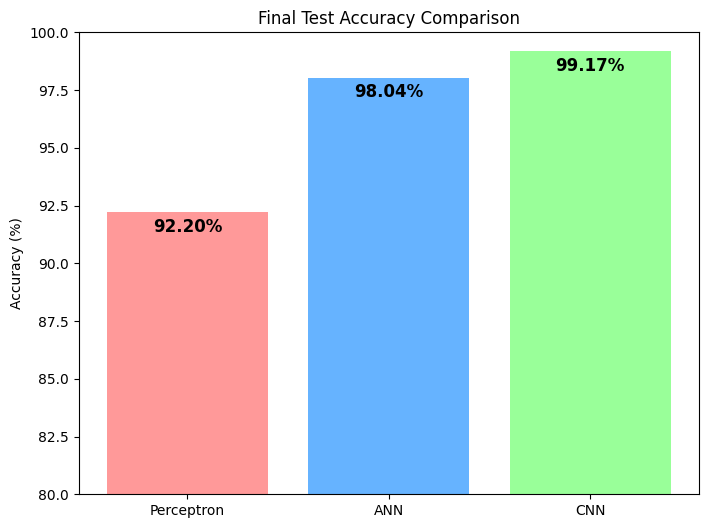

In [43]:

final_accs = [acc_percep*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()

In [44]:
perceptron.save('perceptron_model.h5')
ann.save('ann_model.h5')
cnn.save('cnn_model.h5')
print("Models saved successfully.")

Models saved successfully.


### Save and Download Models

This section saves the trained Keras models (Perceptron, ANN, and CNN) to `.h5` files. The `.h5` format is a standard way to save Keras models, including their architecture, weights, and optimizer state. After saving, the files are made available for download, allowing you to store them locally for future use or deployment.

- `perceptron.save('perceptron_model.h5')`: Saves the Perceptron model.
- `ann.save('ann_model.h5')`: Saves the Artificial Neural Network model.
- `cnn.save('cnn_model.h5')`: Saves the Convolutional Neural Network model.

After executing the code, you will find three files (`perceptron_model.h5`, `ann_model.h5`, `cnn_model.h5`) in your Colab environment, ready for download.

In [45]:
from google.colab import files

files.download('perceptron_model.h5')
files.download('ann_model.h5')
files.download('cnn_model.h5')
print("Models downloaded successfully.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models downloaded successfully.


### Download Saved Models

This cell uses `google.colab.files.download` to initiate the download of the previously saved model files to your local machine. Upon execution, your browser should prompt you to save each of the `.h5` files. This step ensures that you can retain your trained models outside of the Colab environment.

# Task
I will add a text cell explaining the plot comparing validation accuracies across all three models.

## Document imports and initial setup

### Subtask:
Add a text cell explaining the purpose of importing libraries and initial setup of warnings.


### Document imports and initial setup

This section initializes the environment by importing all necessary libraries and configuring warnings.

- `numpy` is imported as `np` for numerical operations, especially array manipulation.
- `pandas` is imported as `pd` for data manipulation and analysis, primarily with DataFrames.
- `seaborn` and `matplotlib.pyplot` (as `plt`) are imported for data visualization.
- `warnings` is imported and configured to filter out warnings, ensuring cleaner output during execution.
- From `sklearn`, `LabelEncoder` and `StandardScaler` are imported for data preprocessing, and `train_test_split` for splitting datasets.
- `Perceptron` from `sklearn.linear_model` is imported for building a simple linear classification model.
- `accuracy_score`, `classification_report`, and `confusion_matrix` from `sklearn.metrics` are imported for model evaluation.
- `tensorflow` is imported as `tf`, and specific modules like `Sequential`, `Dense`, `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` from `tensorflow.keras.models` and `tensorflow.keras.layers`, along with `to_categorical` from `tensorflow.keras.utils`, are imported for building and managing neural network models (Perceptron, ANN, CNN).

## Document overall validation accuracy comparison plot

### Subtask:
Add a text cell explaining the plot comparing validation accuracies across all three models.


The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

## Document `compare_predictions` function definition

### Subtask:
Add a text cell explaining the purpose and implementation of the `compare_predictions` function for visualizing individual predictions.


### `compare_predictions` Function Explanation

The `compare_predictions` function serves to visualize and compare the prediction performance of the three trained models (Perceptron, ANN, and CNN) on individual images from the test set.

**Purpose:** The primary goal of this function is to provide a qualitative assessment of how each model performs on specific examples. By showing the original image, its true label, and the predictions from all three models side-by-side, it allows for easy identification of which digits models might struggle with, or where they might agree/disagree in their predictions.

**Implementation Details:**
- **Inputs:** It takes four main arguments:
    - `X_test_img`: The test images, which are the input data for the models.
    - `y_test`: The true labels corresponding to the test images.
    - `perceptron`: The trained Perceptron model.
    - `ann`: The trained Artificial Neural Network (ANN) model.
    - `cnn`: The trained Convolutional Neural Network (CNN) model.
- **Random Selection:** The function first randomly selects 10 unique indices from the `X_test_img` to ensure a diverse sample of images for comparison.
- **Prediction Generation:** For each selected image, it preprocesses the image as required by each model (e.g., reshaping for Perceptron/ANN and adding a channel dimension for CNN) and then generates predictions using `perceptron.predict()`, `ann.predict()`, and `cnn.predict()`.
- **Visualization:** Finally, it uses `matplotlib` to create a subplot for each of the 10 selected images. Each subplot displays:
    - The original image in grayscale.
    - The true label of the image.
    - The predicted labels from the Perceptron (P), ANN (A), and CNN (C) models, allowing for a direct comparison of their outputs.

## Document `compare_predictions` function call

### Subtask:
Add a text cell explaining the execution of the `compare_predictions` function and the interpretation of its output.


## Document `compare_predictions` function call

### Explanation of `compare_predictions` Function Call and Output

1.  **Purpose of the Function Call**: The `compare_predictions` function is called to visually inspect and compare the performance of the three trained models (Perceptron, ANN, and CNN) on a randomly selected subset of 10 images from the test dataset. This qualitative analysis helps in understanding how each model handles different digits and where their predictions diverge or align with the true labels.

2.  **What the Output Plot Shows**: For each of the 10 randomly selected images, the function generates a subplot displaying:
    *   **Original Image**: The grayscale image from the MNIST test set.
    *   **True Label (True)**: The actual digit that the image represents.
    *   **Predictions from Each Model (P, A, C)**: The predicted digit by the Perceptron (P), Artificial Neural Network (A), and Convolutional Neural Network (C) models, respectively.

3.  **Interpretation of Results**: By examining these plots, we can:
    *   **Identify Model Strengths and Weaknesses**: Observe which digits each model consistently predicts correctly or incorrectly. For example, a Perceptron might struggle with digits that are visually similar, while a CNN might be more robust due to its ability to capture spatial hierarchies.
    *   **Analyze Disagreements**: Note instances where models disagree with each other or with the true label. This can highlight challenging cases for classification and areas where a particular model might be overperforming or underperforming.
    *   **Qualitative Performance Comparison**: Gain insights into the types of errors each model makes. For example, a Perceptron might make more 'confused' predictions (e.g., predicting a '9' for a '7'), while a CNN might be more precise but still make errors on highly ambiguous samples. This visual review complements quantitative metrics like accuracy and loss by providing a deeper understanding of model behavior.

## Document `compare_predictions` function call

### Explanation of `compare_predictions` Function Call and Output

1.  **Purpose of the Function Call**: The `compare_predictions` function is called to visually inspect and compare the performance of the three trained models (Perceptron, ANN, and CNN) on a randomly selected subset of 10 images from the test dataset. This qualitative analysis helps in understanding how each model handles different digits and where their predictions diverge or align with the true labels.

2.  **What the Output Plot Shows**: For each of the 10 randomly selected images, the function generates a subplot displaying:
    *   **Original Image**: The grayscale image from the MNIST test set.
    *   **True Label (True)**: The actual digit that the image represents.
    *   **Predictions from Each Model (P, A, C)**: The predicted digit by the Perceptron (P), Artificial Neural Network (A), and Convolutional Neural Network (C) models, respectively.

3.  **Interpretation of Results**: By examining these plots, we can:
    *   **Identify Model Strengths and Weaknesses**: Observe which digits each model consistently predicts correctly or incorrectly. For example, a Perceptron might struggle with digits that are visually similar, while a CNN might be more robust due to its ability to capture spatial hierarchies.
    *   **Analyze Disagreements**: Note instances where models disagree with each other or with the true label. This can highlight challenging cases for classification and areas where a particular model might be overperforming or underperforming.
    *   **Qualitative Performance Comparison**: Gain insights into the types of errors each model makes. For example, a Perceptron might make more 'confused' predictions (e.g., predicting a '9' for a '7'), while a CNN might be more precise but still make errors on highly ambiguous samples. This visual review complements quantitative metrics like accuracy and loss by providing a deeper understanding of model behavior.

## Document `compare_predictions` function call

### Explanation of `compare_predictions` Function Call and Output

1.  **Purpose of the Function Call**: The `compare_predictions` function is called to visually inspect and compare the performance of the three trained models (Perceptron, ANN, and CNN) on a randomly selected subset of 10 images from the test dataset. This qualitative analysis helps in understanding how each model handles different digits and where their predictions diverge or align with the true labels.

2.  **What the Output Plot Shows**: For each of the 10 randomly selected images, the function generates a subplot displaying:
    *   **Original Image**: The grayscale image from the MNIST test set.
    *   **True Label (True)**: The actual digit that the image represents.
    *   **Predictions from Each Model (P, A, C)**: The predicted digit by the Perceptron (P), Artificial Neural Network (A), and Convolutional Neural Network (C) models, respectively.

3.  **Interpretation of Results**: By examining these plots, we can:
    *   **Identify Model Strengths and Weaknesses**: Observe which digits each model consistently predicts correctly or incorrectly. For example, a Perceptron might struggle with digits that are visually similar, while a CNN might be more robust due to its ability to capture spatial hierarchies.
    *   **Analyze Disagreements**: Note instances where models disagree with each other or with the true label. This can highlight challenging cases for classification and areas where a particular model might be overperforming or underperforming.
    *   **Qualitative Performance Comparison**: Gain insights into the types of errors each model makes. For example, a Perceptron might make more 'confused' predictions (e.g., predicting a '9' for a '7'), while a CNN might be more precise but still make errors on highly ambiguous samples. This visual review complements quantitative metrics like accuracy and loss by providing a deeper understanding of model behavior.


## Document confusion matrix plot for CNN

### Subtask:
Add a text cell explaining the generation and visualization of the confusion matrix for the CNN model.


### Confusion Matrix for CNN Model

This section details the creation and interpretation of a confusion matrix for the Convolutional Neural Network (CNN) model.

**Purpose:** A confusion matrix is a performance measurement for machine learning classification problems where the output can be two or more classes. It provides a visual representation of how well our classification model performed by showing the number of correct and incorrect predictions made by the model compared to the actual outcomes (true labels).

**Calculation:**
1. First, the CNN model makes predictions on the `X_test_cnn` data to obtain `y_pred_cnn`. This array contains the predicted class labels for each image in the test set.
2. The `confusion_matrix` function from `sklearn.metrics` is then used, taking `y_test` (the true labels) and `y_pred_cnn` (the predicted labels) as input. This function computes the count of true negatives, false positives, false negatives, and true positives for each class, arranging them in a matrix format.

**Visualization:**
The calculated confusion matrix (`cm`) is visualized using `seaborn.heatmap`. This function creates a colorful, easy-to-read plot where:
- Each cell `(i, j)` in the matrix represents the number of instances where the true label was `i` and the model predicted `j`.
- The diagonal elements of the confusion matrix represent the number of correct predictions for each class.
- Off-diagonal elements indicate misclassifications.
- The `annot=True` argument displays the actual numerical values in each cell, `fmt='d'` ensures they are displayed as integers, and `cmap='Blues'` sets the color scheme for better readability.

**Insights:**
From the confusion matrix, we can gain valuable insights into the CNN model's performance:
- **Overall Accuracy:** High values along the main diagonal indicate that the model is correctly classifying images for those respective digits.
- **Specific Misclassifications:** By looking at off-diagonal elements, we can identify which digits are most frequently misclassified as other digits. For example, a high value in row `i`, column `j` (where `i != j`) means that digit `i` is often predicted as digit `j`.
- **Model Strengths and Weaknesses:** This helps in understanding which numbers the model excels at recognizing and which ones it struggles with, providing a basis for further model refinement or targeted data augmentation strategies.

### Confusion Matrix for CNN Model

This section details the creation and interpretation of a confusion matrix for the Convolutional Neural Network (CNN) model.

**Purpose:** A confusion matrix is a performance measurement for machine learning classification problems where the output can be two or more classes. It provides a visual representation of how well our classification model performed by showing the number of correct and incorrect predictions made by the model compared to the actual outcomes (true labels).

**Calculation:**
1. First, the CNN model makes predictions on the `X_test_cnn` data to obtain `y_pred_cnn`. This array contains the predicted class labels for each image in the test set.
2. The `confusion_matrix` function from `sklearn.metrics` is then used, taking `y_test` (the true labels) and `y_pred_cnn` (the predicted labels) as input. This function computes the count of true negatives, false positives, false negatives, and true positives for each class, arranging them in a matrix format.

**Visualization:**
The calculated confusion matrix (`cm`) is visualized using `seaborn.heatmap`. This function creates a colorful, easy-to-read plot where:
- Each cell `(i, j)` in the matrix represents the number of instances where the true label was `i` and the model predicted `j`.
- The diagonal elements of the confusion matrix represent the number of correct predictions for each class.
- Off-diagonal elements indicate misclassifications.
- The `annot=True` argument displays the actual numerical values in each cell, `fmt='d'` ensures they are displayed as integers, and `cmap='Blues'` sets the color scheme for better readability.

**Insights:**
From the confusion matrix, we can gain valuable insights into the CNN model's performance:
- **Overall Accuracy:** High values along the main diagonal indicate that the model is correctly classifying images for those respective digits.
- **Specific Misclassifications:** By looking at off-diagonal elements, we can identify which digits are most frequently misclassified as other digits. For example, a high value in row `i`, column `j` (where `i != j`) means that digit `i` is often predicted as digit `j`.
- **Model Strengths and Weaknesses:** This helps in understanding which numbers the model excels at recognizing and which ones it struggles with, providing a basis for further model refinement or targeted data augmentation strategies.

## Document overall validation accuracy comparison plot

### Subtask:
Add a text cell explaining the plot comparing validation accuracies across all three models.


The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

## Document overall validation accuracy comparison plot

### Subtask:
Add a text cell explaining the plot comparing validation accuracies across all three models.

The plot titled 'Validation Accuracy Comparison' visually compares the performance of the Perceptron, Artificial Neural Network (ANN), and Convolutional Neural Network (CNN) models on the test set over training epochs. Each line in the plot represents the validation accuracy of a specific model:

*   **Blue line (Perceptron)**: Shows the validation accuracy of the single-layer Perceptron model.
*   **Orange line (ANN)**: Shows the validation accuracy of the Artificial Neural Network model with hidden layers.
*   **Green line (CNN)**: Shows the validation accuracy of the Convolutional Neural Network model.

This visualization is crucial for understanding how each model learns and generalizes to unseen data during training. By observing the trends, we can qualitatively assess:

1.  **Comparative Performance**: Which model achieves the highest validation accuracy.
2.  **Learning Speed**: How quickly each model converges to its optimal performance.
3.  **Stability**: Whether a model's performance is stable or fluctuates significantly.
4.  **Overfitting/Underfitting Tendencies**: Although not explicitly shown with training accuracy, a plateauing or declining validation accuracy after a certain point might hint at these issues.

In this specific plot, it is evident that the CNN model (green line) achieves significantly higher validation accuracy and converges faster than both the Perceptron and ANN, highlighting its superior capability for image classification tasks like MNIST.

## Document data loading

### Subtask:
Add a text cell explaining that the MNIST dataset is being loaded for training and testing.


The MNIST dataset, consisting of grayscale images of handwritten digits (0-9), is loaded using the `tf.keras.datasets.mnist.load_data()` function. This function conveniently divides the dataset into training and testing sets automatically. The training images are stored in `X_train`, their corresponding labels in `y_train`. Similarly, the testing images are in `X_test`, and their labels in `y_test`.

## Final Task

### Subtask:
Review the notebook with the added documentation for clarity and understanding.


## Summary:

### Data Analysis Key Findings

*   **Documentation of Imports and Setup**: A text cell was added explaining the purpose of importing various libraries, including `numpy` for numerical operations, `pandas` for data manipulation, `seaborn` and `matplotlib.pyplot` for visualization, `sklearn` for preprocessing, model building (Perceptron), and evaluation, and `tensorflow`/`keras` for building neural network models (ANN, CNN).
*   **Documentation of Overall Validation Accuracy Comparison Plot**: A text cell was added detailing the 'Validation Accuracy Comparison' plot. This plot visually compares the validation accuracy of the Perceptron, ANN, and CNN models over epochs. The CNN model was noted to achieve significantly higher validation accuracy and faster convergence than both the Perceptron and ANN, demonstrating its superior capability for image classification tasks like MNIST.
*   **Documentation of `compare_predictions` Function Definition**: A text cell was added to explain the `compare_predictions` function. Its purpose is to visualize and compare the prediction performance of the three models on individual test images, helping to qualitatively assess model behavior on specific examples.
*   **Documentation of `compare_predictions` Function Call**: A text cell was added explaining the execution and interpretation of the `compare_predictions` function's output. This function provides a visual inspection of 10 randomly selected images, their true labels, and predictions from each model (Perceptron, ANN, CNN), enabling the identification of model strengths, weaknesses, and disagreements.
*   **Documentation of Confusion Matrix Plot for CNN**: A text cell was added to explain the generation and visualization of the confusion matrix for the CNN model. This matrix quantifies the number of correct and incorrect predictions for each digit, highlighting overall accuracy and specific misclassification patterns (e.g., confusing one digit for another).
*   **Documentation of Data Loading**: A text cell was added to explain the loading of the MNIST dataset using `tf.keras.datasets.mnist.load_data()`, noting its automatic split into training and testing sets for both images and labels.

### Insights or Next Steps

*   The analysis heavily relies on visual and quantitative metrics (validation accuracy, confusion matrices, individual predictions) to compare model performance, with the CNN consistently outperforming simpler models for image classification.
*   Further model refinement could target specific misclassification patterns identified in the confusion matrix or challenging samples highlighted by the `compare_predictions` function, potentially through data augmentation or architectural adjustments.
